In [1]:
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler

from datetime import datetime

import sys
sys.path.append("../")

from model_utility import * 
from utility import * 

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.9.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
LOOKBACK = 61
TRAIN_SPLIT_RATIO = 0.9
columns = [CLOSE_INDEX]

LAST_MONTH_NUM_RECORDS = 2880

In [4]:
todays_date = datetime.now().strftime('%Y-%m-%d')
download_monthly_klines('spot', [ETH], ['15m'], '2019-01-01', todays_date, 'train')

Found 1 symbols
[1/1] - start download monthly ETHUSDT klines 

File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-01.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-02.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-03.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-04.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-05.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-06.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-07.zip
[##################################################]
File Download: /content/train/ETHUSDT/ETHUSDT-15m-2019-08.zip
[##################################################]
File Download: /

In [5]:
dataframe = get_data('train', ETH)

train/ETHUSDT/ETHUSDT-15m-2019-01.csv
train/ETHUSDT/ETHUSDT-15m-2019-02.csv
train/ETHUSDT/ETHUSDT-15m-2019-03.csv
train/ETHUSDT/ETHUSDT-15m-2019-04.csv
train/ETHUSDT/ETHUSDT-15m-2019-05.csv
train/ETHUSDT/ETHUSDT-15m-2019-06.csv
train/ETHUSDT/ETHUSDT-15m-2019-07.csv
train/ETHUSDT/ETHUSDT-15m-2019-08.csv
train/ETHUSDT/ETHUSDT-15m-2019-09.csv
train/ETHUSDT/ETHUSDT-15m-2019-10.csv
train/ETHUSDT/ETHUSDT-15m-2019-11.csv
train/ETHUSDT/ETHUSDT-15m-2019-12.csv
train/ETHUSDT/ETHUSDT-15m-2020-01.csv
train/ETHUSDT/ETHUSDT-15m-2020-02.csv
train/ETHUSDT/ETHUSDT-15m-2020-03.csv
train/ETHUSDT/ETHUSDT-15m-2020-04.csv
train/ETHUSDT/ETHUSDT-15m-2020-05.csv
train/ETHUSDT/ETHUSDT-15m-2020-06.csv
train/ETHUSDT/ETHUSDT-15m-2020-07.csv
train/ETHUSDT/ETHUSDT-15m-2020-08.csv
train/ETHUSDT/ETHUSDT-15m-2020-09.csv
train/ETHUSDT/ETHUSDT-15m-2020-10.csv
train/ETHUSDT/ETHUSDT-15m-2020-11.csv
train/ETHUSDT/ETHUSDT-15m-2020-12.csv
train/ETHUSDT/ETHUSDT-15m-2021-01.csv
train/ETHUSDT/ETHUSDT-15m-2021-02.csv
train/ETHUSD

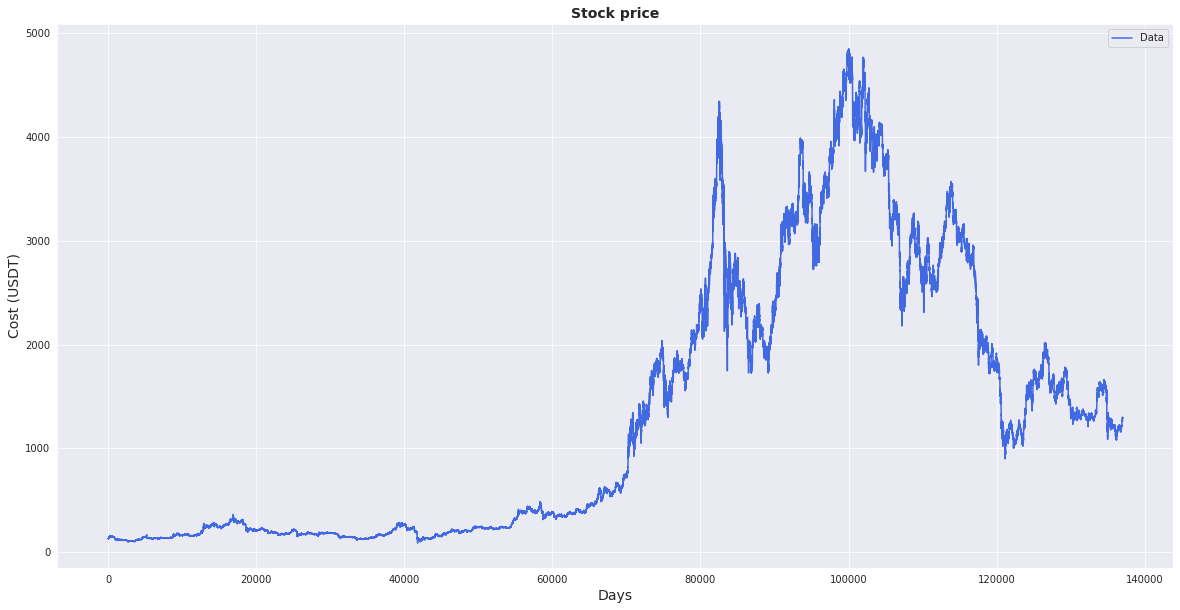

In [6]:
dataframe = dataframe[dataframe[IGNORE_INDEX] == 0]
plot_graph(pd.DataFrame(dataframe[CLOSE_INDEX].values))

In [7]:
scalers = {}
for col in columns:
    scaler = MinMaxScaler().fit(dataframe[[col]])
    dataframe[col] = scaler.transform(dataframe[[col]])
    scalers[col] = scaler

dataframe = dataframe[columns]

In [8]:
x_train, y_train, x_test, y_test = split_data(dataframe, LOOKBACK, TRAIN_SPLIT_RATIO, CLOSE_INDEX-4)

print('x_train.shape = {}'.format(x_train.shape))
print('y_train.shape = {}'.format(y_train.shape))
print('x_test.shape = {}'.format(x_test.shape))
print('y_test.shape = {}'.format(y_test.shape))

x_train.shape = (123260, 60, 1)
y_train.shape = (123260,)
x_test.shape = (13695, 60, 1)
y_test.shape = (13695,)


In [9]:
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [10]:
input_dim = x_train.shape[1]
n_features = x_train.shape[2]
output_dim = 1

In [11]:
lstm_model1 = tf.keras.Sequential()

lstm_model1.add(tf.keras.layers.LSTM(256, input_shape=(input_dim, n_features)))
lstm_model1.add(tf.keras.layers.Dense(1))

lstm_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [12]:
lstm_model1.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [13]:
hist1 = lstm_model1.fit(x_train, y_train, epochs=20)

Epoch 1/20
3852/3852 [==============================] - 26s 5ms/step - loss: 0.0037 - root_mean_squared_error: 0.0116
Epoch 2/20
3852/3852 [==============================] - 22s 6ms/step - loss: 0.0021 - root_mean_squared_error: 0.0034
Epoch 3/20
3852/3852 [==============================] - 21s 5ms/step - loss: 0.0018 - root_mean_squared_error: 0.0029
Epoch 4/20
3852/3852 [==============================] - 21s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0027
Epoch 5/20
3852/3852 [==============================] - 21s 5ms/step - loss: 0.0016 - root_mean_squared_error: 0.0026
Epoch 6/20
3852/3852 [==============================] - 21s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0025
Epoch 7/20
3852/3852 [==============================] - 21s 5ms/step - loss: 0.0014 - root_mean_squared_error: 0.0024
Epoch 8/20
3852/3852 [==============================] - 22s 6ms/step - loss: 0.0014 - root_mean_squared_error: 0.0024
Epoch 9/20
3852/3852 [==============================] - 

In [14]:
lstm_model1.evaluate(x_test, y_test)

428/428 [==============================] - 2s 3ms/step - loss: 0.0015 - root_mean_squared_error: 0.0019


[0.001536733703687787, 0.0019388314103707671]

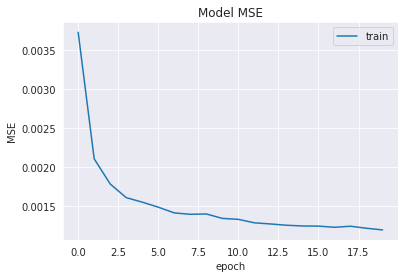

In [15]:
plt.plot(hist1.history['loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [16]:
y_train_pred = lstm_model1.predict(x_train)

3852/3852 [==============================] - 10s 2ms/step


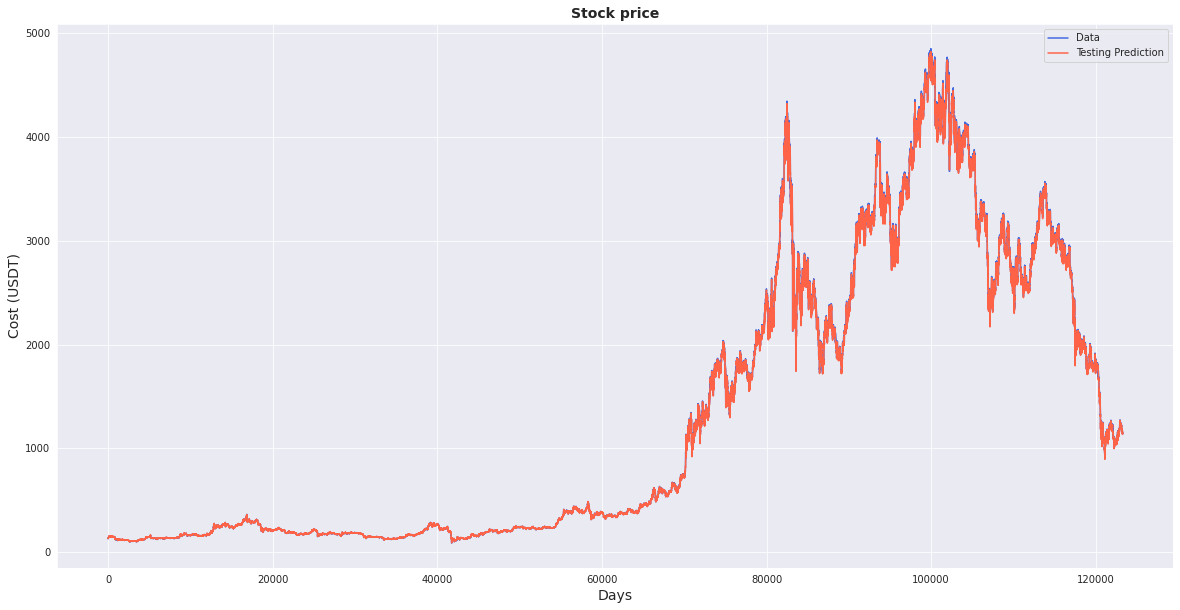

In [17]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train_pred.reshape(-1, 1))))

In [18]:
y_test_pred = lstm_model1.predict(x_test)

428/428 [==============================] - 1s 3ms/step


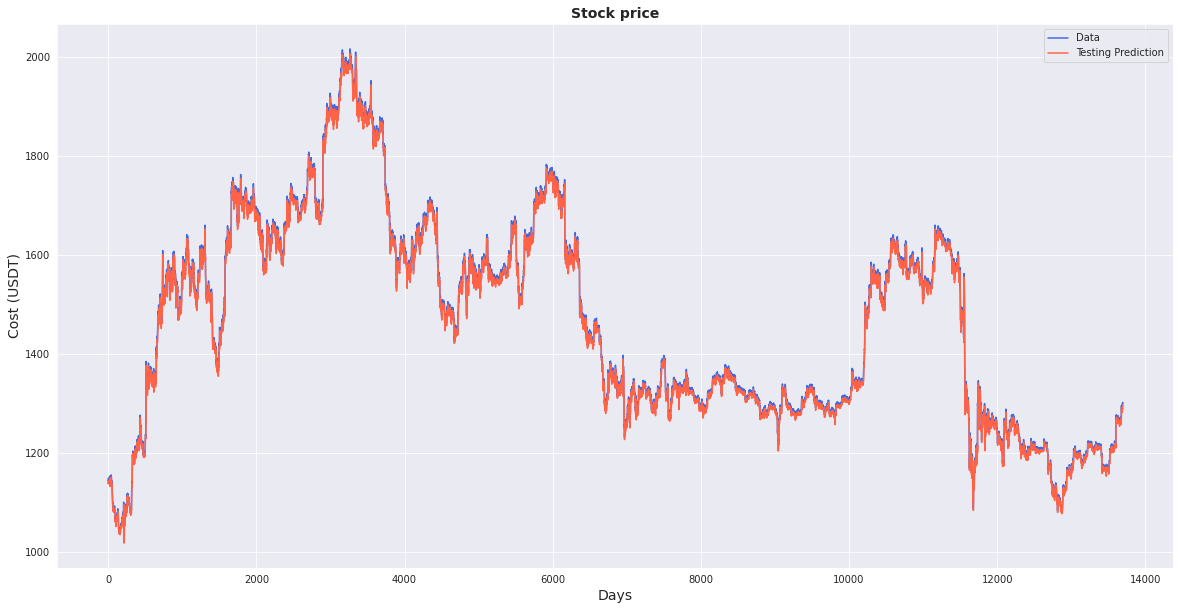

In [19]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1))))

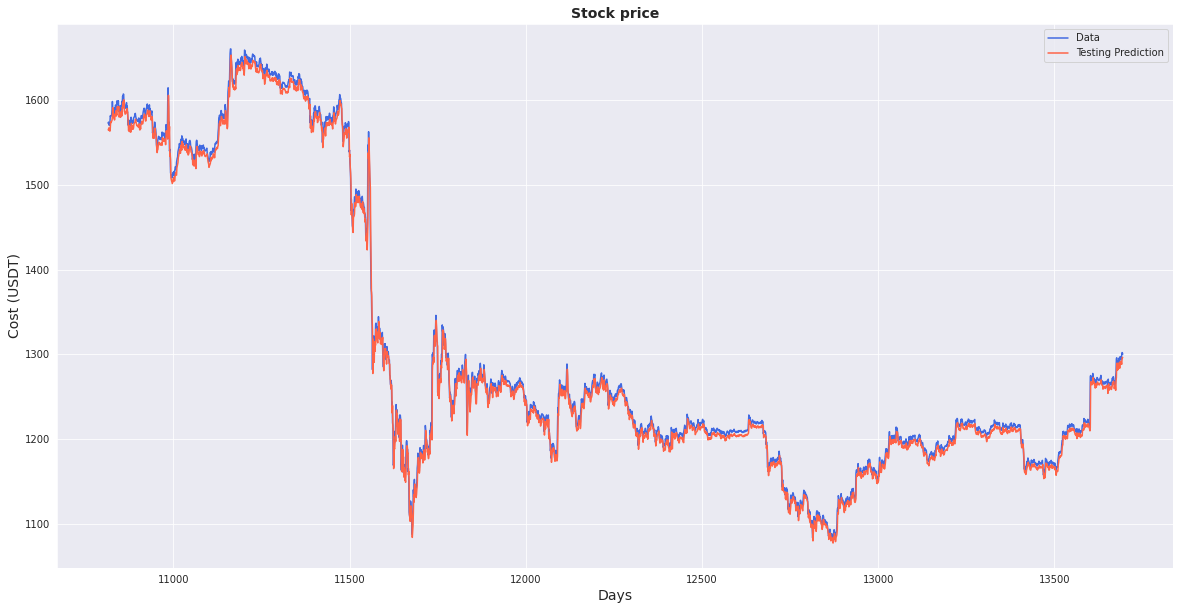

In [20]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:], 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:])

In [21]:
lstm_model2 = tf.keras.Sequential()

lstm_model2.add(tf.keras.layers.LSTM(128 , return_sequences = True , input_shape=(input_dim, n_features)))
lstm_model2.add(tf.keras.layers.LSTM(128,  return_sequences = True ))
lstm_model2.add(tf.keras.layers.LSTM(128))

lstm_model2.add(tf.keras.layers.Dense(1))

lstm_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_2 (LSTM)               (None, 60, 128)           131584    
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 329,857
Trainable params: 329,857
Non-trainable params: 0
_________________________________________________________________


In [22]:
lstm_model2.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [23]:
hist2 = lstm_model2.fit(x_train, y_train, epochs=20)

Epoch 1/20
3852/3852 [==============================] - 48s 12ms/step - loss: 0.0061 - root_mean_squared_error: 0.0142
Epoch 2/20
3852/3852 [==============================] - 44s 11ms/step - loss: 0.0038 - root_mean_squared_error: 0.0061
Epoch 3/20
3852/3852 [==============================] - 44s 11ms/step - loss: 0.0031 - root_mean_squared_error: 0.0050
Epoch 4/20
3852/3852 [==============================] - 44s 11ms/step - loss: 0.0026 - root_mean_squared_error: 0.0041
Epoch 5/20
3852/3852 [==============================] - 45s 12ms/step - loss: 0.0025 - root_mean_squared_error: 0.0039
Epoch 6/20
3852/3852 [==============================] - 44s 11ms/step - loss: 0.0021 - root_mean_squared_error: 0.0034
Epoch 7/20
3852/3852 [==============================] - 44s 11ms/step - loss: 0.0021 - root_mean_squared_error: 0.0032
Epoch 8/20
3852/3852 [==============================] - 44s 11ms/step - loss: 0.0019 - root_mean_squared_error: 0.0031
Epoch 9/20
3852/3852 [==========================

In [24]:
lstm_model2.evaluate(x_test, y_test)

428/428 [==============================] - 3s 6ms/step - loss: 0.0010 - root_mean_squared_error: 0.0015


[0.0010254416847601533, 0.0015091582899913192]

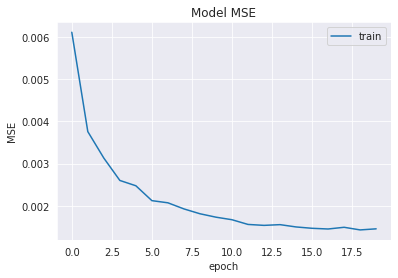

In [25]:
plt.plot(hist2.history['loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [26]:
y_train_pred = lstm_model2.predict(x_train)

3852/3852 [==============================] - 20s 5ms/step


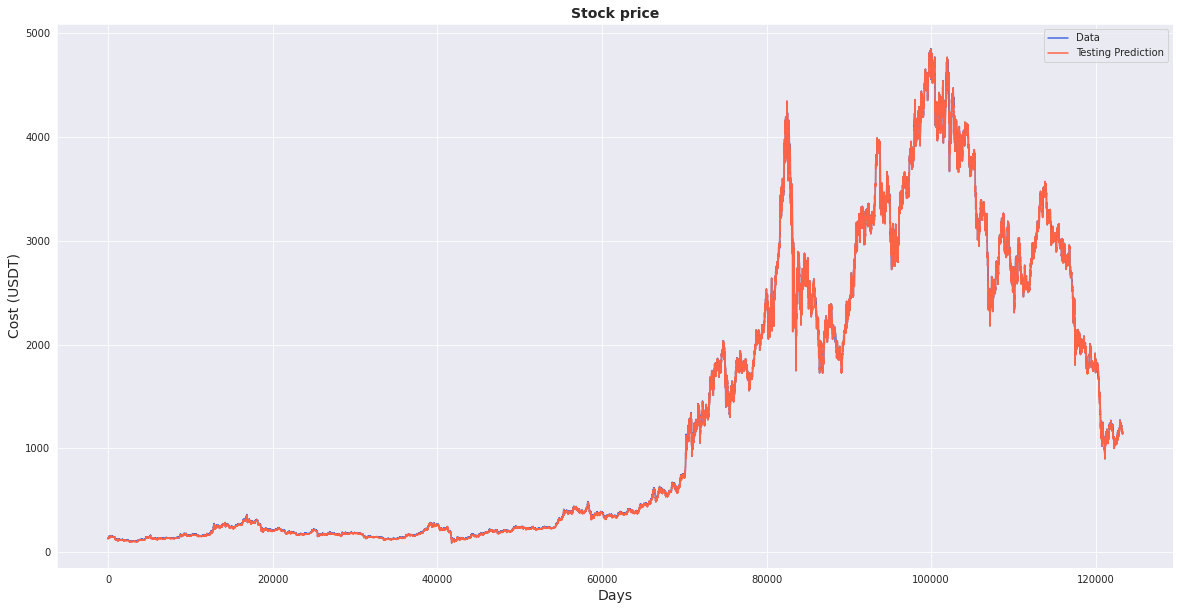

In [27]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train_pred.reshape(-1, 1))))

In [28]:
y_test_pred = lstm_model2.predict(x_test)

428/428 [==============================] - 2s 5ms/step


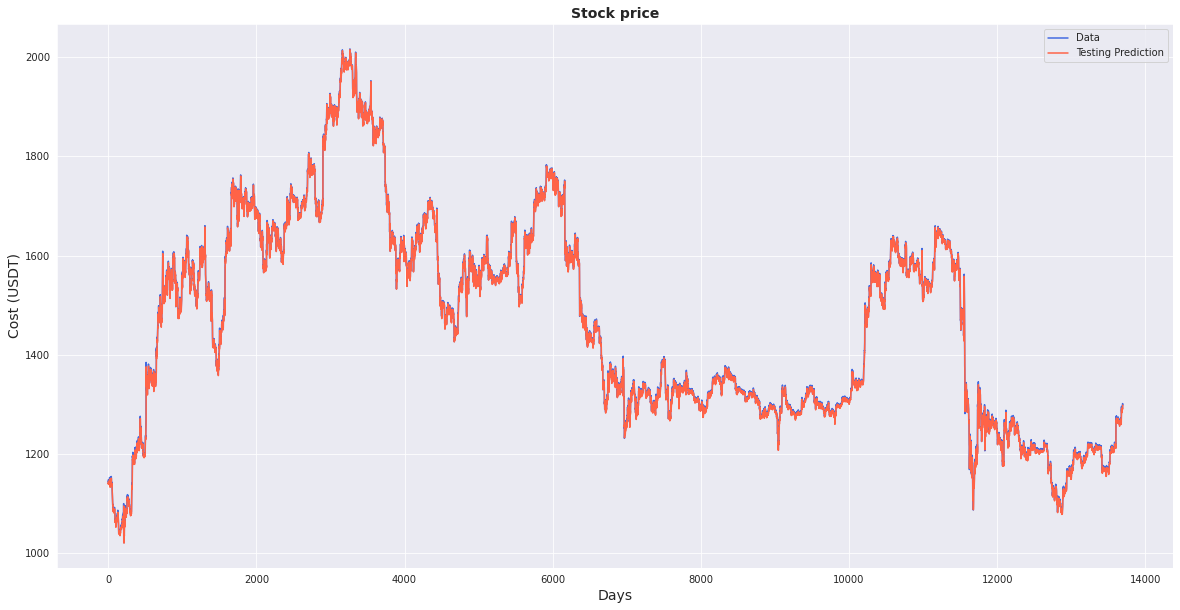

In [29]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1))))

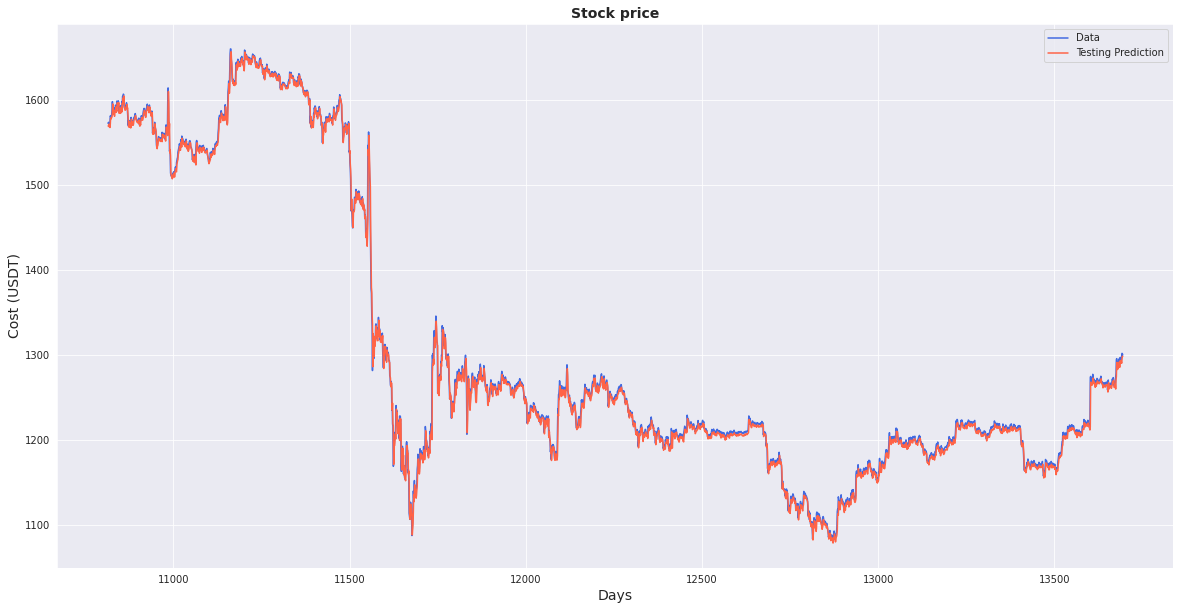

In [30]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:], 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:])

In [31]:
lstm_model3 = tf.keras.Sequential()

lstm_model3.add(tf.keras.layers.LSTM(64 , return_sequences = True , input_shape=(input_dim, n_features)))
lstm_model3.add(tf.keras.layers.LSTM(64 ,  return_sequences = True ))
lstm_model3.add(tf.keras.layers.LSTM(64 ,  return_sequences = True ))
lstm_model3.add(tf.keras.layers.LSTM(64 ,  return_sequences = True ))
lstm_model3.add(tf.keras.layers.LSTM(64))

lstm_model3.add(tf.keras.layers.Dense(1))

lstm_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 60, 64)            33024     
                                                                 
 lstm_6 (LSTM)               (None, 60, 64)            33024     
                                                                 
 lstm_7 (LSTM)               (None, 60, 64)            33024     
                                                                 
 lstm_8 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 149,057
Trainable params: 149,057
Non-tr

In [32]:
lstm_model3.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [33]:
hist3 = lstm_model3.fit(x_train, y_train, epochs=20)

Epoch 1/20
3852/3852 [==============================] - 59s 14ms/step - loss: 0.0075 - root_mean_squared_error: 0.0146
Epoch 2/20
3852/3852 [==============================] - 53s 14ms/step - loss: 0.0047 - root_mean_squared_error: 0.0076
Epoch 3/20
3852/3852 [==============================] - 53s 14ms/step - loss: 0.0037 - root_mean_squared_error: 0.0058
Epoch 4/20
3852/3852 [==============================] - 54s 14ms/step - loss: 0.0033 - root_mean_squared_error: 0.0052
Epoch 5/20
3852/3852 [==============================] - 53s 14ms/step - loss: 0.0031 - root_mean_squared_error: 0.0049
Epoch 6/20
3852/3852 [==============================] - 53s 14ms/step - loss: 0.0025 - root_mean_squared_error: 0.0040
Epoch 7/20
3852/3852 [==============================] - 54s 14ms/step - loss: 0.0024 - root_mean_squared_error: 0.0039
Epoch 8/20
3852/3852 [==============================] - 53s 14ms/step - loss: 0.0023 - root_mean_squared_error: 0.0036
Epoch 9/20
3852/3852 [==========================

In [34]:
lstm_model3.evaluate(x_test, y_test)

428/428 [==============================] - 4s 7ms/step - loss: 0.0014 - root_mean_squared_error: 0.0018


[0.0013591176830232143, 0.001779124024324119]

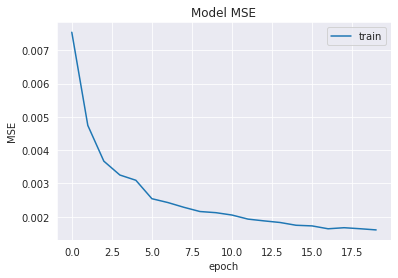

In [35]:
plt.plot(hist3.history['loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [36]:
y_train_pred = lstm_model3.predict(x_train)

3852/3852 [==============================] - 26s 6ms/step


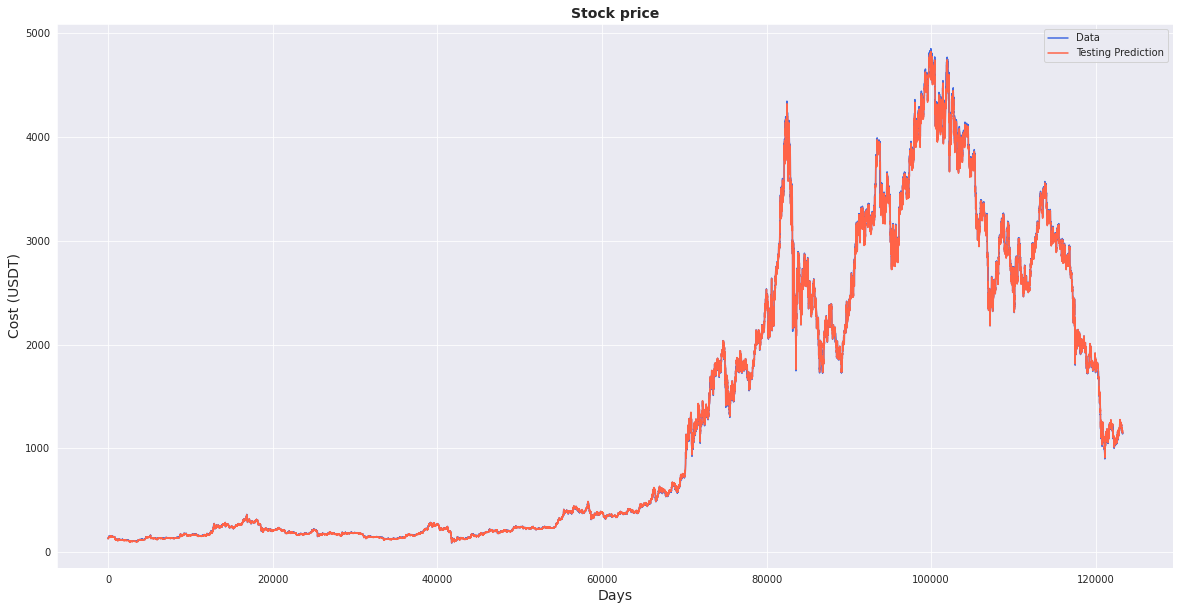

In [37]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train_pred.reshape(-1, 1))))

In [38]:
y_test_pred = lstm_model3.predict(x_test)

428/428 [==============================] - 3s 6ms/step


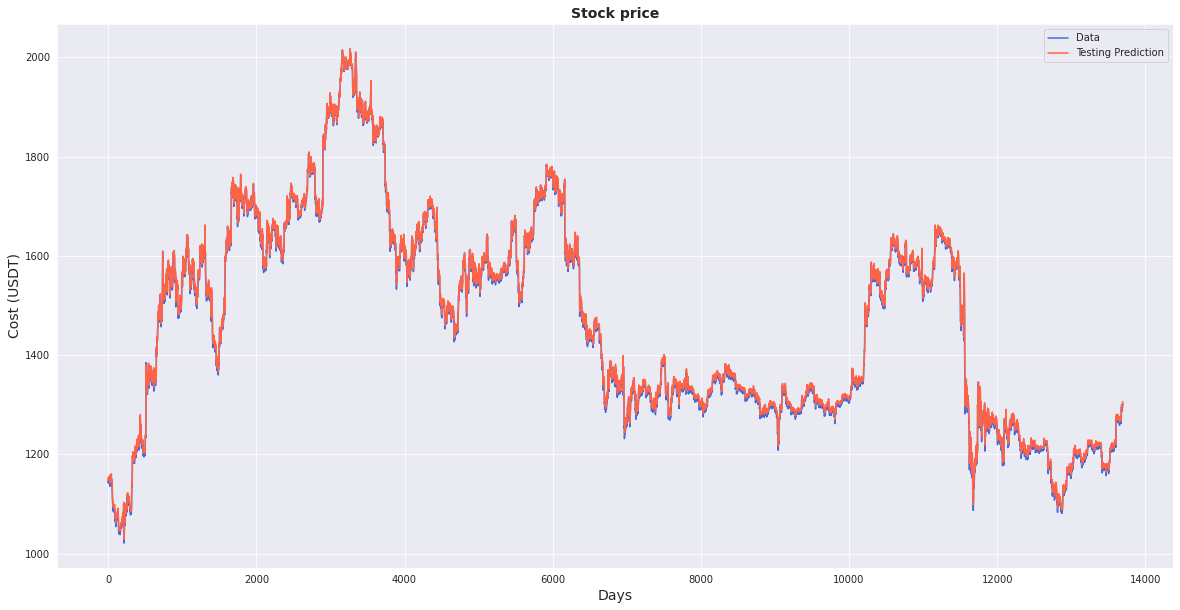

In [39]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1))))

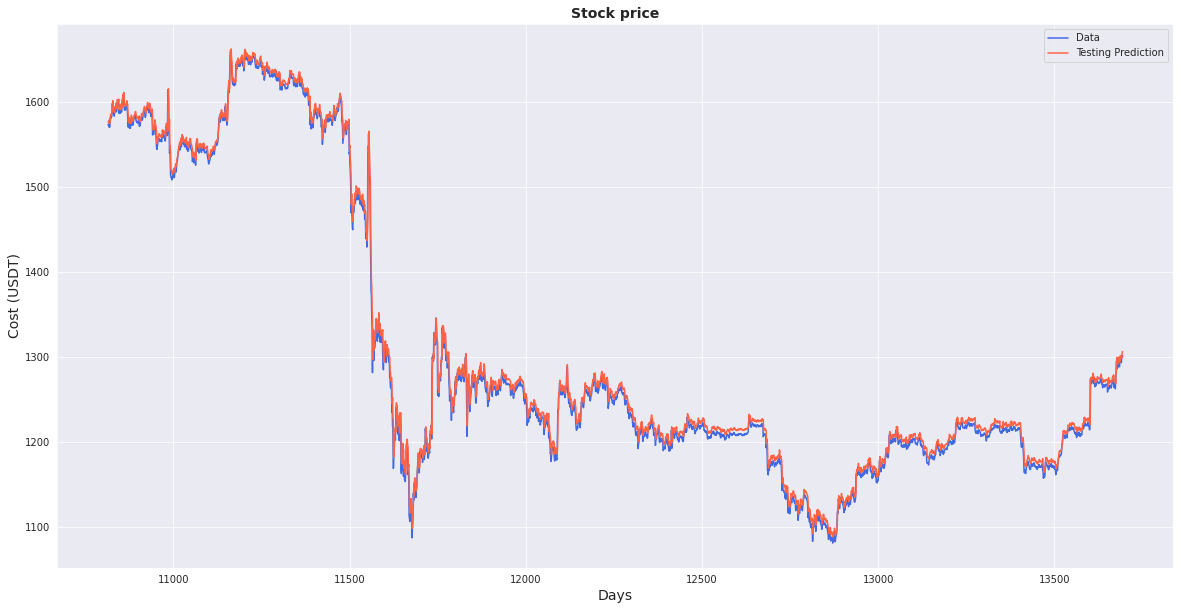

In [40]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:], 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:])

In [41]:
lstm_model4 = tf.keras.Sequential()

lstm_model4.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256), input_shape=(input_dim, n_features)))
lstm_model4.add(tf.keras.layers.Dense(1))

lstm_model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 512)              528384    
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 528,897
Trainable params: 528,897
Non-trainable params: 0
_________________________________________________________________


In [42]:
lstm_model4.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [43]:
hist4 = lstm_model4.fit(x_train, y_train, epochs=20)

Epoch 1/20
3852/3852 [==============================] - 35s 8ms/step - loss: 0.0040 - root_mean_squared_error: 0.0107
Epoch 2/20
3852/3852 [==============================] - 32s 8ms/step - loss: 0.0022 - root_mean_squared_error: 0.0036
Epoch 3/20
3852/3852 [==============================] - 32s 8ms/step - loss: 0.0018 - root_mean_squared_error: 0.0029
Epoch 4/20
3852/3852 [==============================] - 32s 8ms/step - loss: 0.0017 - root_mean_squared_error: 0.0029
Epoch 5/20
3852/3852 [==============================] - 33s 8ms/step - loss: 0.0016 - root_mean_squared_error: 0.0027
Epoch 6/20
3852/3852 [==============================] - 32s 8ms/step - loss: 0.0015 - root_mean_squared_error: 0.0025
Epoch 7/20
3852/3852 [==============================] - 32s 8ms/step - loss: 0.0015 - root_mean_squared_error: 0.0025
Epoch 8/20
3852/3852 [==============================] - 32s 8ms/step - loss: 0.0014 - root_mean_squared_error: 0.0024
Epoch 9/20
3852/3852 [==============================] - 

In [44]:
lstm_model4.evaluate(x_test, y_test)

428/428 [==============================] - 3s 5ms/step - loss: 0.0013 - root_mean_squared_error: 0.0017


[0.0013037980534136295, 0.0017313992138952017]

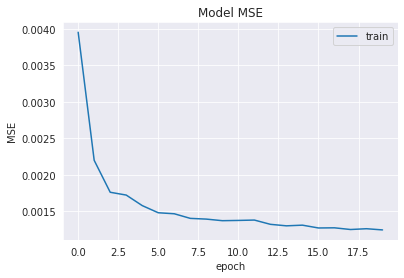

In [45]:
plt.plot(hist4.history['loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [46]:
y_train_pred = lstm_model4.predict(x_train)

3852/3852 [==============================] - 14s 4ms/step


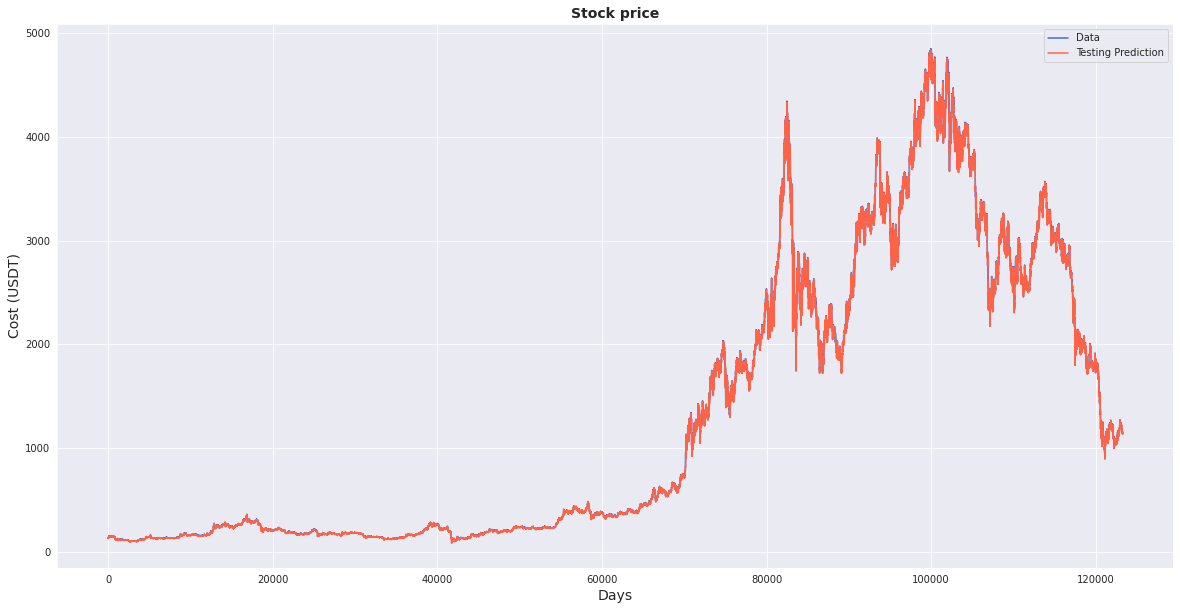

In [47]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_train_pred.reshape(-1, 1))))

In [48]:
y_test_pred = lstm_model4.predict(x_test)

428/428 [==============================] - 2s 4ms/step


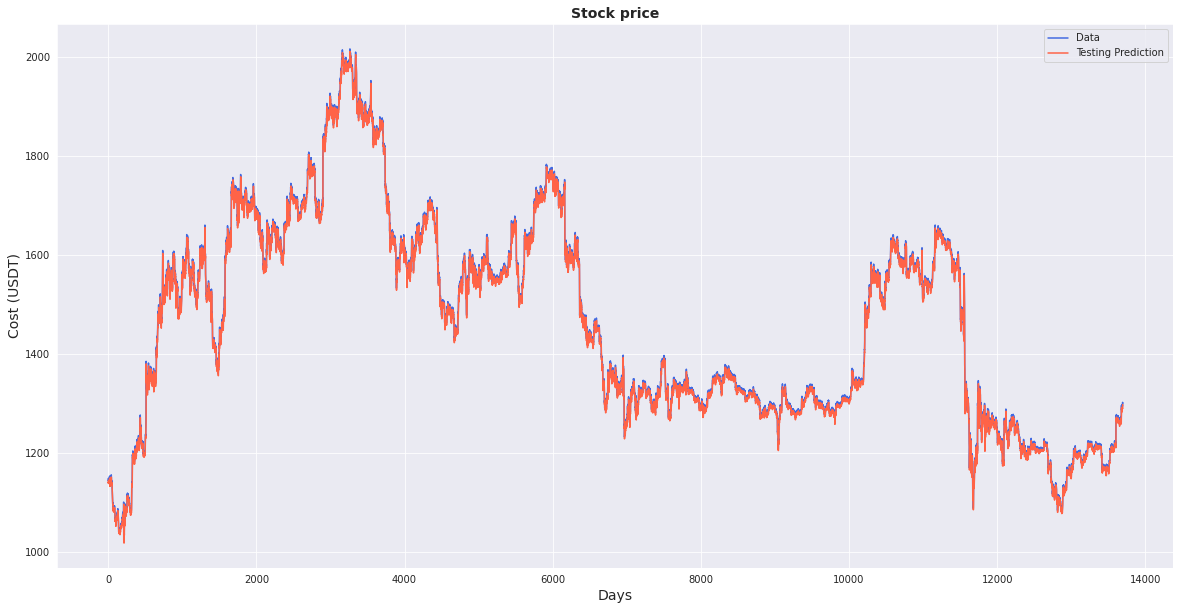

In [49]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1))), 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1))))

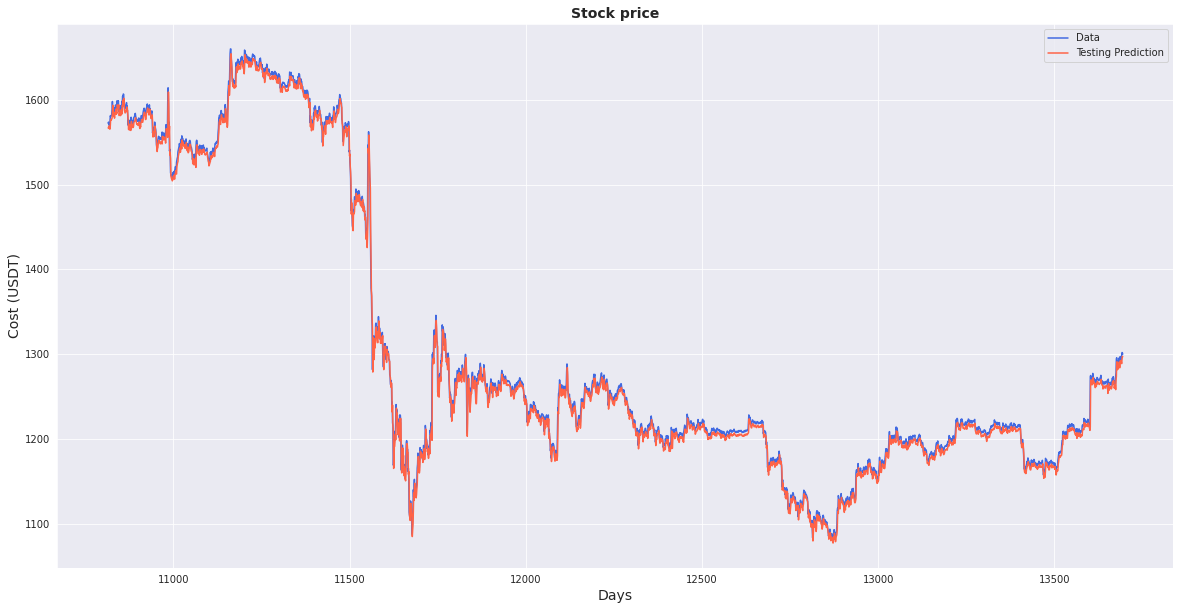

In [50]:
plot_graph(pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test.numpy().reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:], 
           pd.DataFrame(scalers[CLOSE_INDEX].inverse_transform(y_test_pred.reshape(-1, 1)))[-LAST_MONTH_NUM_RECORDS:])